# Cross Validation

### Import Libraries

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Standard Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set Options for display
pd.options.display.float_format = '{:.2f}'.format

sns.set_style("whitegrid")
sns.set_context("paper")

%matplotlib inline

### Additional Libraries

In [3]:
#Importing the Tree and Metrics Module
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier

#Train-Test Split
from sklearn.model_selection import train_test_split

#Standard Scaler
from sklearn.preprocessing import StandardScaler

#Classification Metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Load and Explore the Dataset

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Load the dataset

filepath = "dataset.xlsx"
df = pd.read_excel(filepath)

In [6]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PTOs Utilized
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,8,0,1,6,4,0,5,16
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,10,3,3,10,7,1,7,10
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,8,3,3,8,7,3,0,2
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,6,3,3,2,2,2,2,11


In [7]:
#Assess the dataset using .describe() function
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PTOs Utilized
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,9.19,2.91,2.72,2.73,2.06,2.73,6502.93,2.69,15.21,3.15,2.71,11.28,2.80,2.76,7.01,4.23,2.19,4.12,9.47
std,9.14,8.11,1.02,1.09,0.71,1.11,1.10,4707.96,2.50,3.66,0.36,1.08,7.78,1.29,0.71,6.13,3.62,3.22,3.57,5.77
min,18.00,1.00,1.00,1.00,1.00,1.00,1.00,1009.00,0.00,11.00,3.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,30.00,2.00,2.00,2.00,2.00,1.00,2.00,2911.00,1.00,12.00,3.00,2.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00,4.00
50%,36.00,7.00,3.00,3.00,3.00,2.00,3.00,4919.00,2.00,14.00,3.00,3.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00,9.00
75%,43.00,14.00,4.00,4.00,3.00,3.00,4.00,8379.00,4.00,18.00,3.00,4.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00,14.00
max,60.00,29.00,5.00,4.00,4.00,5.00,4.00,19999.00,9.00,25.00,4.00,4.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00,19.00


In [8]:
#Check the number of features and observations in the dataset
df.shape

(1470, 28)

In [12]:
#Check the number of classes we have
df["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [13]:
sns.countplot(data = df, x = "Attrition")

<Axes: xlabel='Attrition', ylabel='count'>

# Build the Model

### Split the features and the target column

In [15]:
x = df.drop(["Attrition"], axis=1)
y = df["Attrition"]

## Cross Validation

### Import the Cross Validation Score Function

In [16]:
#Import the Cross Validation Score function
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

### Run the Cross Validation Function on a Pipeline

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [18]:
logreg = LogisticRegression(C=1.0, class_weight="balanced", solver='liblinear', random_state=30)

dt = DecisionTreeClassifier(criterion="gini", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=30)

rf = RandomForestClassifier(criterion="gini",
                            min_samples_split=2,
                            min_samples_leaf=1,
                            max_depth=12,
                            n_estimators=100,
                            random_state=30)


In [19]:
from sklearn.pipeline import make_pipeline

logreg_pipeline = make_pipeline(StandardScaler(), logreg)

decisiontree_pipeline = make_pipeline(StandardScaler(), dt)

randomforest_pipeline = make_pipeline(StandardScaler(), rf)


## Logistic Regression Scoring

### ROC_AUC

In [20]:
logreg_cv_score_roc = cross_val_score(logreg_pipeline, x, y, cv=5, scoring='roc_auc')*100
logreg_cv_score_roc.mean()

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 406, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 1310, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\utils\_set_output.py", line 313, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\base.py", line 1101, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py", line 878, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py", line 914, in partial_fit
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 751, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Travel_Frequently'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 406, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 1310, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\utils\_set_output.py", line 313, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\base.py", line 1101, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py", line 878, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py", line 914, in partial_fit
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 751, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Travel_Rarely'


### F1

In [ ]:
logreg_cv_score_f1 = cross_val_score(logreg_pipeline, x, y, cv=5, scoring='f1_weighted')*100
logreg_cv_score_f1.mean()


69.51329974421228

### Accuracy

In [ ]:
logreg_cv_score_accuracy = cross_val_score(logreg_pipeline, x, y, cv=5, scoring='accuracy')*100
logreg_cv_score_accuracy.mean()


71.69354838709677

### Recall

In [ ]:
logreg_cv_score_recall = cross_val_score(logreg_pipeline, x, y, cv=5, scoring='recall_weighted')*100
logreg_cv_score_recall.mean()

71.69354838709677

### Precision

In [ ]:
logreg_cv_score_precision = cross_val_score(logreg_pipeline, x, y, cv=5, scoring='precision_weighted')*100
logreg_cv_score_precision.mean()

72.53692416959848

# Decision Tree Scoring

### ROC_AUC

In [ ]:
decisiontree_cv_score = cross_val_score(decisiontree_pipeline, x, y, cv=5, scoring='roc_auc')*100
decisiontree_cv_score.mean()

83.15238095238094

### F1

In [ ]:
decisiontree_cv_score_f1 = cross_val_score(decisiontree_pipeline, x, y, cv=5, scoring='f1_weighted')*100
decisiontree_cv_score_f1.mean()

58.12280518010569

### Accuracy

In [ ]:
decisiontree_cv_score_accuracy = cross_val_score(decisiontree_pipeline, x, y, cv=5, scoring='accuracy')*100
decisiontree_cv_score_accuracy.mean()

66.59274193548387

### Recall

In [ ]:
decisiontree_cv_score_recall = cross_val_score(decisiontree_pipeline, x, y, cv=5, scoring='recall_weighted')*100
decisiontree_cv_score_recall.mean()

66.59274193548387

### Precision

In [ ]:
decisiontree_cv_score_precision = cross_val_score(decisiontree_pipeline, x, y, cv=5, scoring='precision_weighted')*100
decisiontree_cv_score_precision.mean()

53.060309085587924

# Random Forest Scoring

### ROC_AUC

In [ ]:
randomforest_cv_score_roc = cross_val_score(randomforest_pipeline, x, y, cv=5, scoring='roc_auc')*100
randomforest_cv_score_roc.mean()

77.57857142857142

### F1

In [ ]:
randomforest_cv_score_f1 = cross_val_score(randomforest_pipeline, x, y, cv=5, scoring='f1_weighted')*100
randomforest_cv_score_f1.mean()

63.01537726537727

### Accuracy

In [ ]:
randomforest_cv_score_accuracy = cross_val_score(randomforest_pipeline, x, y, cv=5, scoring='accuracy')*100
randomforest_cv_score_accuracy.mean()

67.88306451612904

### Recall

In [ ]:
randomforest_cv_score_recall = cross_val_score(randomforest_pipeline, x, y, cv=5, scoring='recall_weighted')*100
randomforest_cv_score_recall.mean()

67.88306451612904

### Precision

In [ ]:
randomforest_cv_score_precision = cross_val_score(randomforest_pipeline, x, y, cv=5, scoring='precision_weighted')*100
randomforest_cv_score_precision.mean()

64.5728046594982

# Build a model using the best Parameter

In [ ]:
clf_best = DecisionTreeClassifier(criterion="gini", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=30)

clf_best.fit(x, y)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=4,
                       random_state=30)

# Feature Importance

In [ ]:
f_importance = clf_best.feature_importances_
f_importance

array([0.87792924, 0.05575919, 0.        , 0.06631157])

In [ ]:
#Put into a DataFrame along with Feature Names for easier understanding.
f_list = x.columns
df_feature_importance = pd.DataFrame(f_importance, index=f_list, columns=["Importance"])

In [ ]:
#Sort the values in Descending order (Most Important -> Least Important)
df_feature_importance.sort_values(["Importance"],ascending=False)

,Importance
Sick_Leaves_Average,0.88
Performance_Engagement_Average,0.07
Self_Assessment_Average,0.06
Performance_Value_Average,0.00


<Axes: >

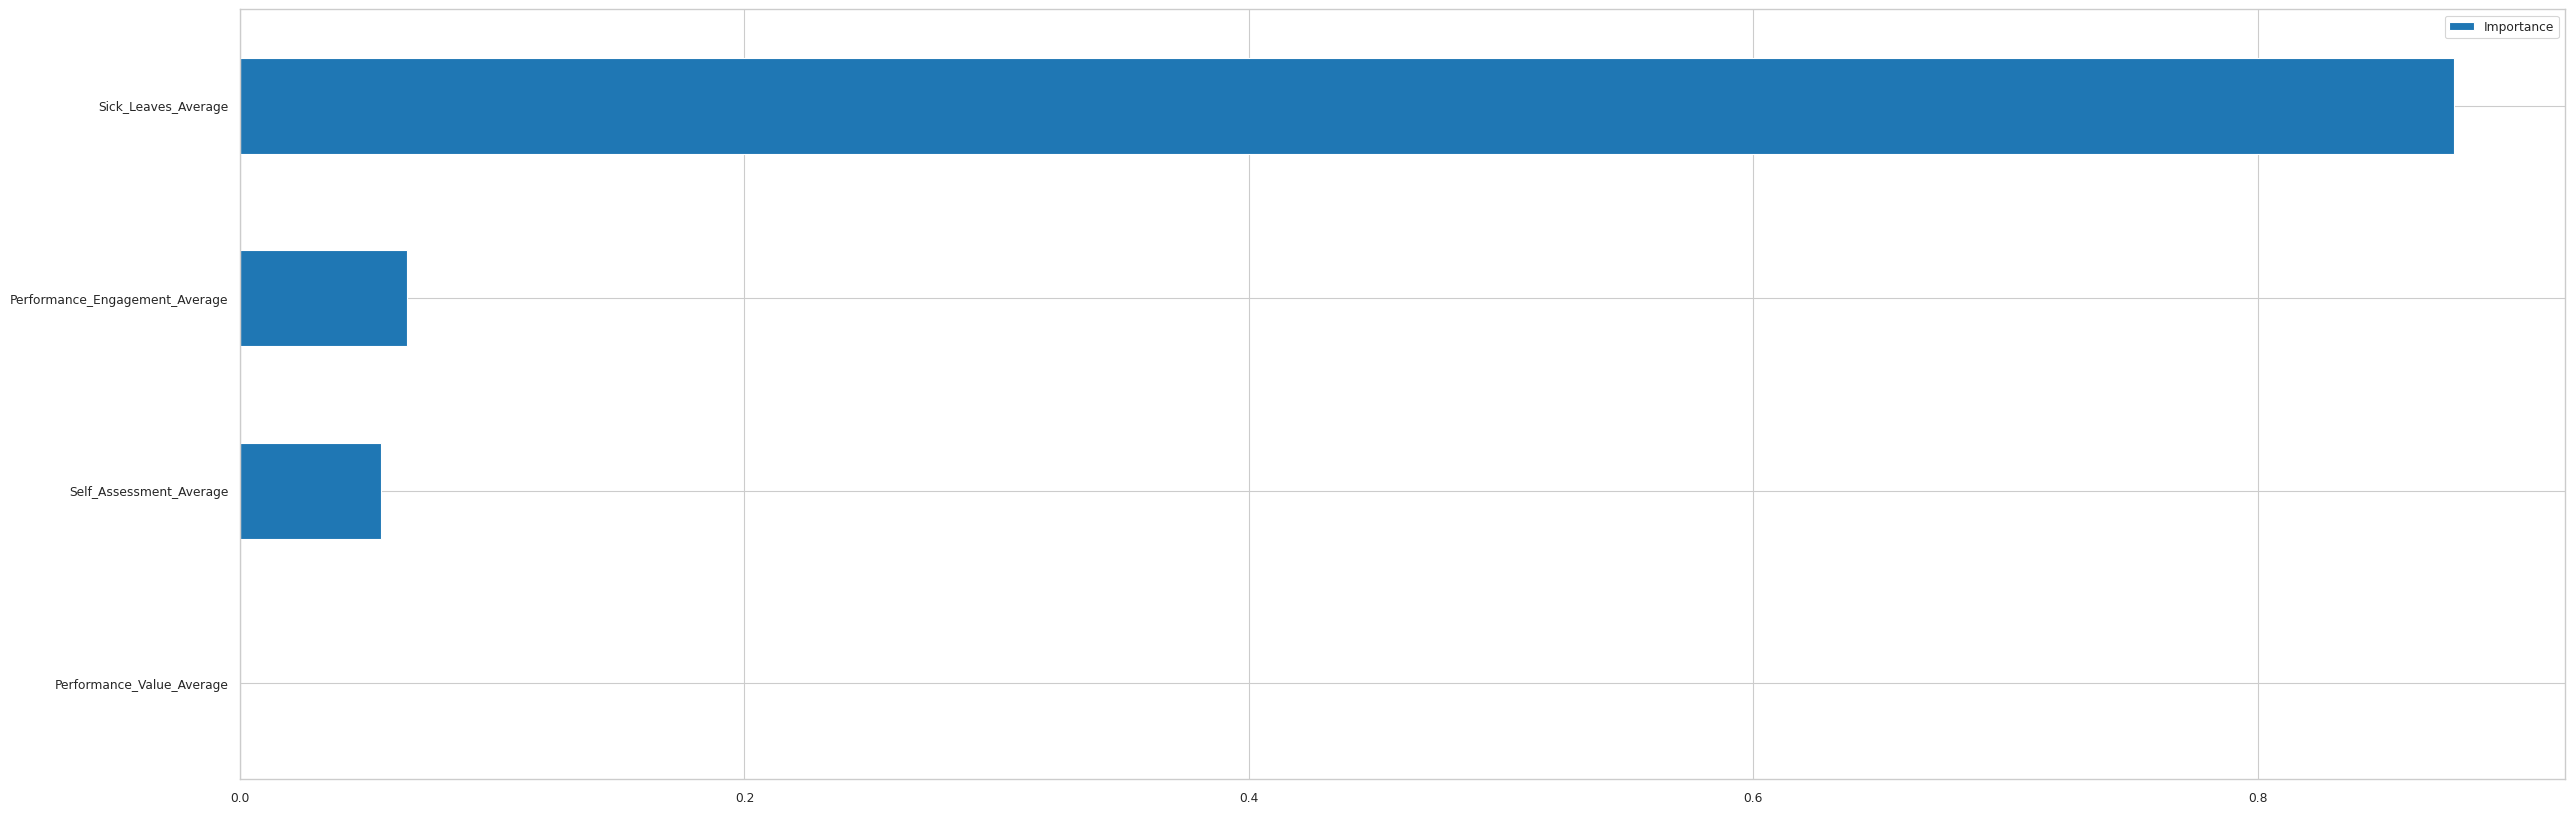

In [ ]:
#Visualize importance using a plot, values should be ascending for plotting purposes

#Sorted DataFrame with 10 important features
df_feature_importance_asc = df_feature_importance.sort_values(["Importance"], ascending = True)[-10:]

#Horizontal Bar Plot
df_feature_importance_asc.plot(kind='barh', figsize=(30,10))

# Visualize Decision Tree

In [ ]:
#Graph Visualization Library
import graphviz

#Graphviz Exporter
from sklearn.tree import export_graphviz

#For display within the Jupyter notebook
from IPython.display import display

In [ ]:
#List of Features
feature_col = list(x.columns)

In [ ]:
#List of Classes

#Get classes
classes = clf_best.classes_

#Convert to String if number
classes = ["%s" % clas for clas in classes]

classes

['Employed', 'Terminated']

In [ ]:
dot_data = export_graphviz(clf_best, feature_names=feature_col, class_names=classes)

graph = graphviz.Source(dot_data)

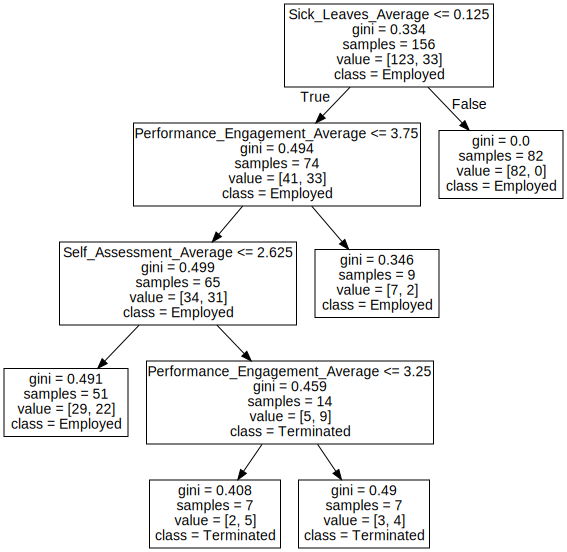

In [ ]:
display(graph)

# Hyper Parameter Optimization

> Add blockquote



In [ ]:
#Create the parameter grid
param_grid = {'min_samples_split':[2,4],
                    'criterion':['gini'],
                    'min_samples_leaf':[1,2,3,4,5]}

### Building Model

In [ ]:
#HyperParameter optimization functions
from sklearn.model_selection import GridSearchCV

#Instantiate the GridSearchCV function: pass the classifier, parameter grid, and number of cv folds
grid_search = GridSearchCV(clf_best, param_grid=param_grid, cv=5, scoring="roc_auc")

In [ ]:
#Fit to the X and y variables. Note that cross-validation is built into the function
grid_search.fit(x,y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=5,
                                              min_samples_split=4,
                                              random_state=30),
             param_grid={'criterion': ['gini'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4]},
             scoring='roc_auc')

# Validate Best Model

In [ ]:
#Access the Best Estimator
print("Best estimator:")
print(grid_search.best_estimator_)

Best estimator:
DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=30)


In [ ]:
#Access the Best Parameters
print("Best parameters:")
print(grid_search.best_params_)

Best parameters:
{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 2}


In [ ]:
#Check the ROC_AUC for the Best Model

best_score = grid_search.best_score_

print("Best score: %.2f" % (best_score * 100))

Best score: 83.15


### Get table of results for all runs

In [ ]:
#Returns Dictionary with information of models built with different parameters
all_results = grid_search.cv_results_

#Put into DataFrame for easy viewing
all_results_df = pd.DataFrame(all_results)

In [ ]:
#View the resulting table
all_results_df.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.00,0.00,0.00,0.00,gini,1,2,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.90,0.77,0.89,0.84,0.41,0.76,0.18,10
1,0.00,0.00,0.00,0.00,gini,1,4,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.90,0.84,0.90,0.84,0.41,0.78,0.19,9
2,0.00,0.00,0.00,0.00,gini,2,2,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.92,0.85,0.90,0.90,0.41,0.79,0.19,5
3,0.00,0.00,0.00,0.00,gini,2,4,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.92,0.85,0.90,0.90,0.41,0.79,0.19,5
4,0.00,0.00,0.00,0.00,gini,3,2,"{'criterion': 'gini', 'min_samples_leaf': 3, '...",0.99,0.75,0.89,0.90,0.41,0.79,0.20,7


In [ ]:
#Sort by "Rank Test Score" to view best models in order
all_results_df.sort_values("rank_test_score").head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.00,0.00,0.00,0.00,gini,5,2,"{'criterion': 'gini', 'min_samples_leaf': 5, '...",0.99,0.77,0.97,0.87,0.55,0.83,0.16,1
9,0.00,0.00,0.00,0.00,gini,5,4,"{'criterion': 'gini', 'min_samples_leaf': 5, '...",0.99,0.77,0.97,0.87,0.55,0.83,0.16,1
6,0.00,0.00,0.00,0.00,gini,4,2,"{'criterion': 'gini', 'min_samples_leaf': 4, '...",0.99,0.75,0.97,0.87,0.41,0.80,0.21,3
